In [1]:
# ============================================================
# PART 2: UNSUPERVISED LEARNING - COMPLETE WITH DATA RELOADING
# ============================================================

# First, reload all necessary libraries and data
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

print("=" * 60)
print("PART 2: UNSUPERVISED LEARNING")
print("=" * 60)

# Step 1: Reload the dataset (same as Part 1)
print("\nStep 1: Reloading the dataset...")

# Download dataset
dataset_path = kagglehub.dataset_download("kaushil268/disease-prediction-using-machine-learning")

# Find and load CSV files
train_path = None
test_path = None
for file in os.listdir(dataset_path):
    if file.endswith('.csv'):
        if 'train' in file.lower():
            train_path = os.path.join(dataset_path, file)
        elif 'test' in file.lower():
            test_path = os.path.join(dataset_path, file)

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print(f"Training data loaded: {train_df.shape}")
print(f"Testing data loaded: {test_df.shape}")

# Step 2: Prepare data (same as Part 1)
print("\nStep 2: Preparing data...")

# Encode target
label_encoder = LabelEncoder()
train_df['prognosis_encoded'] = label_encoder.fit_transform(train_df['prognosis'])

# Separate features
X = train_df.drop(['prognosis', 'prognosis_encoded'], axis=1)
y = train_df['prognosis_encoded']

print(f"Features shape: {X.shape}")

# Split data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Handle missing values with imputation
imputer = SimpleImputer(strategy='mean')
X_train_clean = imputer.fit_transform(X_train_scaled)
X_val_clean = imputer.transform(X_val_scaled)
X_test_clean = imputer.transform(X_test_scaled)

print("Data preparation complete!")
print(f"Clean training data shape: {X_train_clean.shape}")

# Now we have X_train_clean defined!
X_unsupervised = X_train_clean.copy()
print(f"\nData ready for unsupervised learning: {X_unsupervised.shape} samples, {X_unsupervised.shape[1]} features")


PART 2: UNSUPERVISED LEARNING

Step 1: Reloading the dataset...


100%|██████████| 29.8k/29.8k [00:00<00:00, 33.0MB/s]

Extracting files...
Training data loaded: (4920, 134)
Testing data loaded: (42, 133)

Step 2: Preparing data...
Features shape: (4920, 133)


Training set: (3445, 133)
Validation set: (737, 133)
Test set: (738, 133)
Data preparation complete!
Clean training data shape: (3445, 132)

Data ready for unsupervised learning: (3445, 132) samples, 132 features



STEP 1: K-MEANS CLUSTERING

K-Means tries to group similar symptoms into clusters.
We need to find the best number of clusters (k).

Testing different numbers of clusters...
  k=2: Silhouette Score = 0.3057
  k=3: Silhouette Score = 0.1624
  k=4: Silhouette Score = 0.0373
  k=5: Silhouette Score = 0.2553
  k=6: Silhouette Score = 0.1683
  k=7: Silhouette Score = 0.1297
  k=8: Silhouette Score = 0.2393
  k=9: Silhouette Score = 0.1890
  k=10: Silhouette Score = 0.2147
  k=11: Silhouette Score = 0.2305
  k=12: Silhouette Score = 0.2571
  k=13: Silhouette Score = 0.2758
  k=14: Silhouette Score = 0.3299


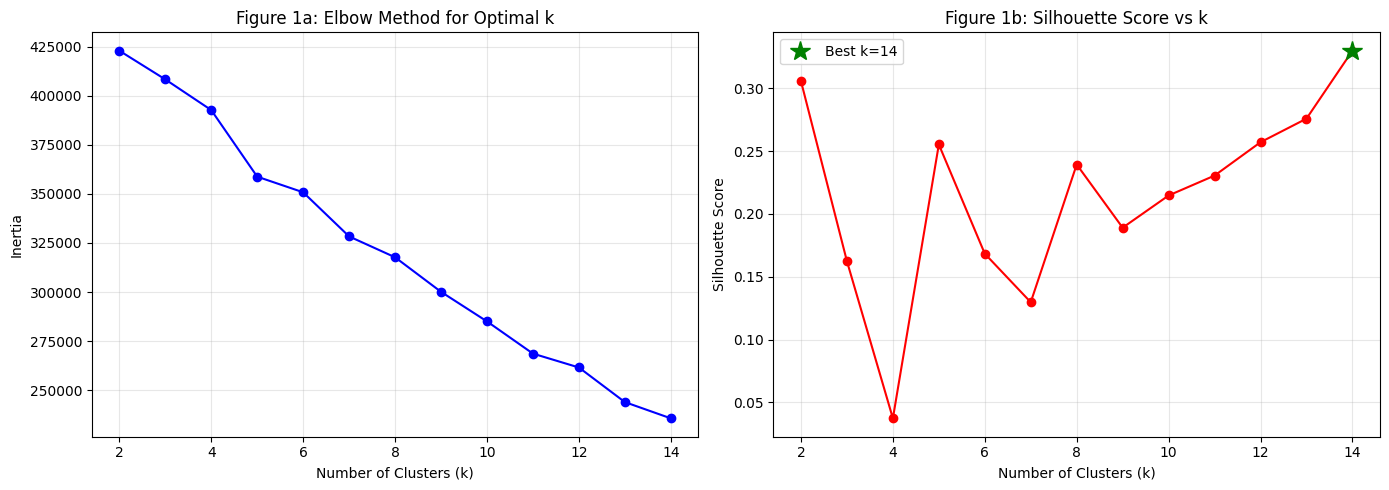


Best number of clusters: k=14

Applying K-Means with k=14...

K-Means Performance:
  Silhouette Score: 0.3299
  Davies-Bouldin Index: 0.9464


In [2]:
# ============================================================
# STEP 1: K-MEANS CLUSTERING
# ============================================================

print("\n" + "=" * 60)
print("STEP 1: K-MEANS CLUSTERING")
print("=" * 60)

print("\nK-Means tries to group similar symptoms into clusters.")
print("We need to find the best number of clusters (k).")

# Try different numbers of clusters
inertias = []
silhouette_scores = []
K_range = range(2, 15)

print("\nTesting different numbers of clusters...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_unsupervised)

    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(X_unsupervised, labels)
    silhouette_scores.append(sil_score)

    print(f"  k={k}: Silhouette Score = {sil_score:.4f}")

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Figure 1a: Elbow Method for Optimal k')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Figure 1b: Silhouette Score vs k')
axes[1].grid(True, alpha=0.3)

best_k_idx = np.argmax(silhouette_scores)
best_k = K_range[best_k_idx]
axes[1].plot(best_k, silhouette_scores[best_k_idx], 'g*', markersize=15, label=f'Best k={best_k}')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\nBest number of clusters: k={best_k}")

# Apply K-Means with best k
print(f"\nApplying K-Means with k={best_k}...")
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_unsupervised)

kmeans_silhouette = silhouette_score(X_unsupervised, kmeans_labels)
kmeans_davies = davies_bouldin_score(X_unsupervised, kmeans_labels)

print(f"\nK-Means Performance:")
print(f"  Silhouette Score: {kmeans_silhouette:.4f}")
print(f"  Davies-Bouldin Index: {kmeans_davies:.4f}")

In [3]:
# ============================================================
# STEP 2: DBSCAN CLUSTERING
# ============================================================

print("\n" + "=" * 60)
print("STEP 2: DBSCAN CLUSTERING")
print("=" * 60)

# Try different eps values
eps_values = np.arange(0.5, 3.0, 0.25)
n_clusters_dbscan = []
silhouette_dbscan = []
noise_points = []

print("\nTesting different eps values...")
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_unsupervised)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = sum(labels == -1)
    n_clusters_dbscan.append(n_clusters)
    noise_points.append(n_noise)

    if n_clusters >= 2:
        sil = silhouette_score(X_unsupervised, labels)
        silhouette_dbscan.append(sil)
        print(f"  eps={eps:.2f}: {n_clusters} clusters, {n_noise} noise, Silhouette={sil:.4f}")
    else:
        silhouette_dbscan.append(0)
        print(f"  eps={eps:.2f}: {n_clusters} clusters, {n_noise} noise")

# Find best eps
best_eps_idx = np.argmax(silhouette_dbscan)
best_eps = eps_values[best_eps_idx]
print(f"\nBest eps value: {best_eps:.2f}")

# Apply DBSCAN with best eps
print(f"\nApplying DBSCAN with eps={best_eps:.2f}...")
dbscan = DBSCAN(eps=best_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_unsupervised)

n_clusters_db = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_db = sum(dbscan_labels == -1)

print(f"\nDBSCAN Results:")
print(f"  Number of clusters: {n_clusters_db}")
print(f"  Noise points: {n_noise_db} ({n_noise_db/len(dbscan_labels)*100:.1f}%)")

if n_clusters_db >= 2:
    dbscan_silhouette = silhouette_score(X_unsupervised, dbscan_labels)
    dbscan_davies = davies_bouldin_score(X_unsupervised, dbscan_labels)
    print(f"  Silhouette Score: {dbscan_silhouette:.4f}")
    print(f"  Davies-Bouldin Index: {dbscan_davies:.4f}")


STEP 2: DBSCAN CLUSTERING

Testing different eps values...
  eps=0.50: 170 clusters, 471 noise, Silhouette=0.7586
  eps=0.75: 170 clusters, 471 noise, Silhouette=0.7586
  eps=1.00: 170 clusters, 471 noise, Silhouette=0.7586
  eps=1.25: 170 clusters, 471 noise, Silhouette=0.7586
  eps=1.50: 170 clusters, 471 noise, Silhouette=0.7586
  eps=1.75: 170 clusters, 471 noise, Silhouette=0.7586
  eps=2.00: 170 clusters, 471 noise, Silhouette=0.7586
  eps=2.25: 150 clusters, 387 noise, Silhouette=0.7370
  eps=2.50: 133 clusters, 332 noise, Silhouette=0.7408
  eps=2.75: 124 clusters, 280 noise, Silhouette=0.7383

Best eps value: 0.50

Applying DBSCAN with eps=0.50...

DBSCAN Results:
  Number of clusters: 170
  Noise points: 471 (13.7%)
  Silhouette Score: 0.7586
  Davies-Bouldin Index: 1.1219



STEP 3: PCA DIMENSIONALITY REDUCTION

Variance explained by first 10 components:
  PC1: 7.35% (cumulative: 7.35%)
  PC2: 6.63% (cumulative: 13.99%)
  PC3: 5.21% (cumulative: 19.20%)
  PC4: 4.84% (cumulative: 24.04%)
  PC5: 4.31% (cumulative: 28.35%)
  PC6: 3.76% (cumulative: 32.11%)
  PC7: 3.64% (cumulative: 35.75%)
  PC8: 3.53% (cumulative: 39.28%)
  PC9: 3.39% (cumulative: 42.68%)
  PC10: 3.29% (cumulative: 45.97%)

Components needed for 85% variance: 28
  Reduced from 132 to 28 dimensions!

First 2 components explain 14.0% of variance


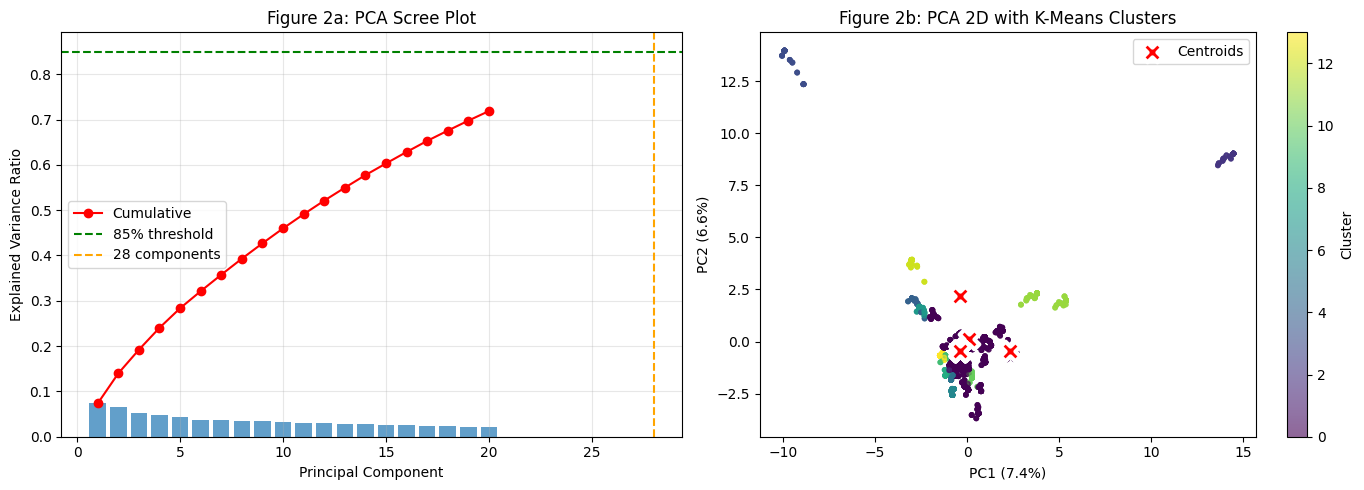

In [4]:
# ============================================================
# STEP 3: PCA DIMENSIONALITY REDUCTION
# ============================================================

print("\n" + "=" * 60)
print("STEP 3: PCA DIMENSIONALITY REDUCTION")
print("=" * 60)

# Apply PCA
pca = PCA()
X_pca_full = pca.fit_transform(X_unsupervised)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print(f"\nVariance explained by first 10 components:")
for i in range(10):
    print(f"  PC{i+1}: {explained_variance_ratio[i]:.2%} (cumulative: {cumulative_variance[i]:.2%})")

# Find components for 85% variance
n_components_85 = np.argmax(cumulative_variance >= 0.85) + 1
print(f"\nComponents needed for 85% variance: {n_components_85}")
print(f"  Reduced from {X_unsupervised.shape[1]} to {n_components_85} dimensions!")

# 2D PCA for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_unsupervised)
print(f"\nFirst 2 components explain {pca_2d.explained_variance_ratio_.sum():.1%} of variance")

# Visualize PCA
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scree plot
axes[0].bar(range(1, 21), explained_variance_ratio[:20], alpha=0.7)
axes[0].plot(range(1, 21), cumulative_variance[:20], 'ro-', label='Cumulative')
axes[0].axhline(y=0.85, color='g', linestyle='--', label='85% threshold')
axes[0].axvline(x=n_components_85, color='orange', linestyle='--', label=f'{n_components_85} components')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Figure 2a: PCA Scree Plot')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2D projection with K-Means clusters
scatter = axes[1].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                          c=kmeans_labels, cmap='viridis', alpha=0.6, s=10)
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', marker='X', s=200, linewidths=3, edgecolors='white', label='Centroids')
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})')
axes[1].set_title('Figure 2b: PCA 2D with K-Means Clusters')
axes[1].legend()
plt.colorbar(scatter, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()


STEP 4: T-SNE VISUALIZATION
Using 1000 samples for t-SNE...
t-SNE complete!


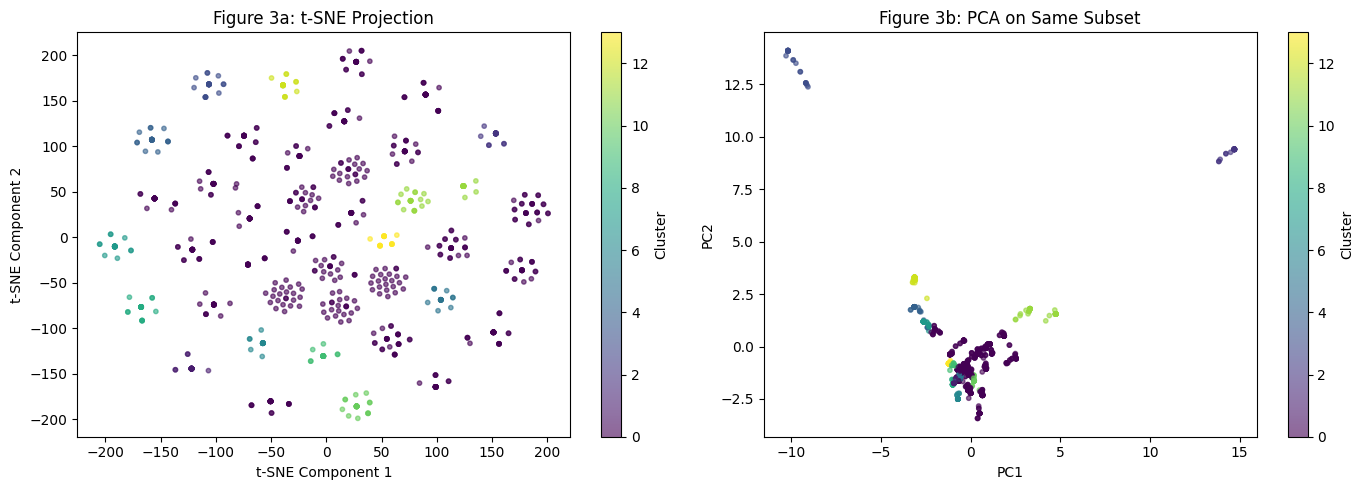


Comparison: PCA vs t-SNE
  PCA: 14.0% variance in 2D
  t-SNE: Better at showing local cluster structure


In [5]:
# ============================================================
# STEP 4: T-SNE VISUALIZATION
# ============================================================

print("\n" + "=" * 60)
print("STEP 4: T-SNE VISUALIZATION")
print("=" * 60)

# Use subset for t-SNE (faster)
sample_size = min(1000, len(X_unsupervised))
indices = np.random.choice(len(X_unsupervised), sample_size, replace=False)
X_tsne_sample = X_unsupervised[indices]
kmeans_labels_sample = kmeans_labels[indices]

print(f"Using {sample_size} samples for t-SNE...")

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne_2d = tsne.fit_transform(X_tsne_sample)

print("t-SNE complete!")

# Visualize t-SNE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# t-SNE with K-Means colors
scatter1 = axes[0].scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1],
                           c=kmeans_labels_sample, cmap='viridis', alpha=0.6, s=10)
axes[0].set_title('Figure 3a: t-SNE Projection')
axes[0].set_xlabel('t-SNE Component 1')
axes[0].set_ylabel('t-SNE Component 2')
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Compare with PCA on same subset
pca_subset = PCA(n_components=2).fit_transform(X_tsne_sample)
scatter2 = axes[1].scatter(pca_subset[:, 0], pca_subset[:, 1],
                           c=kmeans_labels_sample, cmap='viridis', alpha=0.6, s=10)
axes[1].set_title('Figure 3b: PCA on Same Subset')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

print("\nComparison: PCA vs t-SNE")
print(f"  PCA: {pca_2d.explained_variance_ratio_.sum():.1%} variance in 2D")
print("  t-SNE: Better at showing local cluster structure")



STEP 5: COMPARISON AND INSIGHTS

CLUSTERING METHODS COMPARISON
--------------------------------------------------
Metric                    K-Means         DBSCAN         
-------------------------------------------------------
Silhouette Score          0.3299            0.7586
Davies-Bouldin            0.9464            1.1219
Number of Clusters        14              170            
Noise Points              None            471            

KEY INSIGHTS
--------------------------------------------------

1. Natural Disease Groupings:
   K-Means found 14 distinct clusters of symptoms.
   This suggests diseases may group into 14 main categories.

2. Outlier Detection:
   DBSCAN identified 471 samples (13.7%) as outliers.
   These could be rare diseases or unusual symptom combinations.

3. Dimensionality Reduction:
   PCA reduced 132 features to 28 while preserving 85% of information.
   This confirms many symptoms are correlated.

4. Visualization:
   t-SNE shows clearer cluster separ

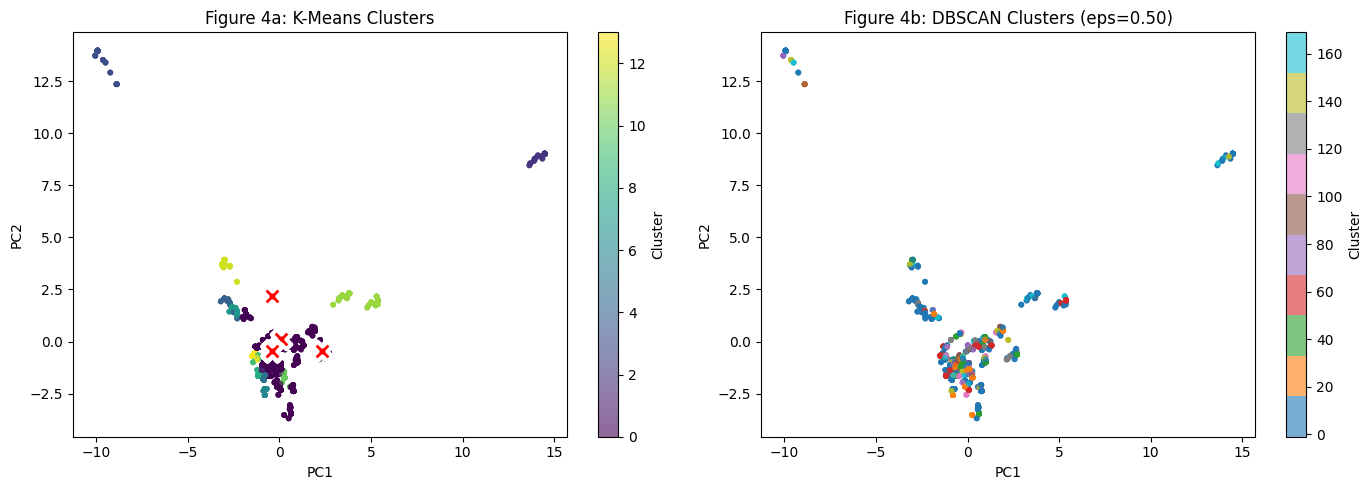

In [6]:
# ============================================================
# STEP 5: COMPARISON AND INSIGHTS
# ============================================================

print("\n" + "=" * 60)
print("STEP 5: COMPARISON AND INSIGHTS")
print("=" * 60)

print("\nCLUSTERING METHODS COMPARISON")
print("-" * 50)
print(f"{'Metric':<25} {'K-Means':<15} {'DBSCAN':<15}")
print("-" * 55)

print(f"{'Silhouette Score':<25} {kmeans_silhouette:.4f}{'':11}", end="")
if n_clusters_db >= 2:
    print(f" {dbscan_silhouette:.4f}")
    print(f"{'Davies-Bouldin':<25} {kmeans_davies:.4f}{'':11} {dbscan_davies:.4f}")
else:
    print(" N/A")
    print(f"{'Davies-Bouldin':<25} {kmeans_davies:.4f}{'':11} N/A")

print(f"{'Number of Clusters':<25} {best_k:<15} {n_clusters_db:<15}")
print(f"{'Noise Points':<25} {'None':<15} {n_noise_db:<15}")

print("\nKEY INSIGHTS")
print("-" * 50)
print(f"""
1. Natural Disease Groupings:
   K-Means found {best_k} distinct clusters of symptoms.
   This suggests diseases may group into {best_k} main categories.

2. Outlier Detection:
   DBSCAN identified {n_noise_db} samples ({n_noise_db/len(dbscan_labels)*100:.1f}%) as outliers.
   These could be rare diseases or unusual symptom combinations.

3. Dimensionality Reduction:
   PCA reduced {X_unsupervised.shape[1]} features to {n_components_85} while preserving 85% of information.
   This confirms many symptoms are correlated.

4. Visualization:
   t-SNE shows clearer cluster separation than PCA,
   confirming distinct disease patterns exist.
""")

# Visualize both methods
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# K-Means
scatter1 = axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                           c=kmeans_labels, cmap='viridis', alpha=0.6, s=10)
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', marker='X', s=200, linewidths=3, edgecolors='white')
axes[0].set_title('Figure 4a: K-Means Clusters')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# DBSCAN
scatter2 = axes[1].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                           c=dbscan_labels, cmap='tab10', alpha=0.6, s=10)
axes[1].set_title(f'Figure 4b: DBSCAN Clusters (eps={best_eps:.2f})')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

In [8]:
# ============================================================
# STEP 6: ETHICAL CONSIDERATIONS
# ============================================================

print("\n" + "=" * 60)
print("STEP 6: ETHICAL CONSIDERATIONS")
print("=" * 60)

print("""
ETHICAL RISKS IN UNSUPERVISED LEARNING
----------------------------------------

1. Bias in Clustering:
   Risk: Clusters may reflect biases in training data
   Example: If certain populations are underrepresented
   Mitigation: Ensure diverse training data, validate clusters across groups

2. Misinterpretation of Clusters:
   Risk: Assuming clusters represent real medical categories
   Example: Statistical groupings may not correspond to actual diseases
   Mitigation: Always validate with medical experts, use as hypothesis generation

3. Privacy Concerns:
   Risk: Clusters might reveal sensitive patient information
   Example: Small clusters could identify individuals
   Mitigation: Anonymize data, use aggregation, implement access controls

4. Reproducibility:
   Risk: Different parameters give different clusters
   Example: K-Means with k=5 vs k=8 tells different stories
   Mitigation: Report parameters, use multiple methods, validate stability

PRACTICAL FEASIBILITY
--------------------

Computational Requirements:
  K-Means: Fast, scales well
  DBSCAN: Moderate, sensitive to parameters
  PCA: Fast, deterministic
  t-SNE: Slow, stochastic

Data Requirements:
  Need sufficient samples per cluster
  Features should be meaningful
  Missing data handled via imputation
""")

print("\n" + "=" * 60)
print("PART 2 COMPLETE")
print("=" * 60)


STEP 6: ETHICAL CONSIDERATIONS

ETHICAL RISKS IN UNSUPERVISED LEARNING
----------------------------------------

1. Bias in Clustering:
   Risk: Clusters may reflect biases in training data
   Example: If certain populations are underrepresented
   Mitigation: Ensure diverse training data, validate clusters across groups

2. Misinterpretation of Clusters:
   Risk: Assuming clusters represent real medical categories
   Example: Statistical groupings may not correspond to actual diseases
   Mitigation: Always validate with medical experts, use as hypothesis generation

3. Privacy Concerns:
   Risk: Clusters might reveal sensitive patient information
   Example: Small clusters could identify individuals
   Mitigation: Anonymize data, use aggregation, implement access controls

4. Reproducibility:
   Risk: Different parameters give different clusters
   Example: K-Means with k=5 vs k=8 tells different stories
   Mitigation: Report parameters, use multiple methods, validate stability

PRAC